# Calculating the Laguerre polynomials
First we calculate the Laguerre polynomials which can be defined by the following formula:
$$
L_n(x)=\sum_{k=0}^{n} \binom{n}{k} \frac{(-1)^k}{k!}x^k.
$$
We will calculate these polynomials with the following recurrent formula:
$$
L_{k+1}(x)=\frac{(2k+1-x)L_k(x)-kL_{k-1}(x)}{k+1},
$$
where $L^{(\alpha)}_0(x)=1$ and $L^{(\alpha)}_1(x)=1+\alpha-x$.

Here we use a special decorator for caching:

In [4]:
def cached(func):
    """
    A decorator which caches values for pure functions
    """
    cache = {}

    def wrapper(*args):
        if args in cache:
            return cache[args]
        result = func(*args)
        cache[args] = result
        return result

    return wrapper

The function that calculates the Laguerre polynomials:

In [12]:
@cached
def laguerre(k, alpha, x):
    if k == 0:
        return 1
    elif k == 1:
        return -x + alpha + 1

    _a = (2 * k - 1 + alpha - x) / k
    _b = (k + alpha - 1) / k

    return _a * laguerre(k - 1, alpha, x) - _b * laguerre(k - 2, alpha, x)


<IPython.core.display.Javascript object>


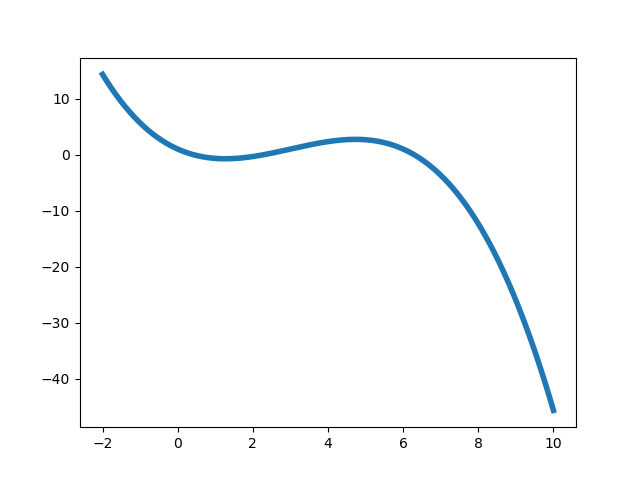

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt

# the order of the polynomials
n = 3

alpha = 0

density = 1000

a = -2
b = 10

xs = [a + (b-a)/density * i for i in range(density+1)]
ys = [laguerre(n, alpha, x) for x in xs]

plt.plot(xs, ys, linewidth=4, label=f'The Laguerre polynomials of order {n}')
plt.show()